# This notebook aims to have a closer look at the data to find interesting insights regarding the data previously cleaned in the file Cleaning.py.

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv("Datasets/titanic_cleaned.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Last Name,First Name,Size of Family,Fare Per Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Braund,Owen Harris,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer),1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,Laina,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Futrelle,Jacques Heath (Lily May Peel),1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Allen,William Henry,0,8.05000


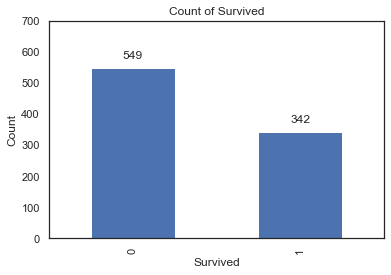

In [143]:
ax = df['Survived'].value_counts().plot(kind='bar')

ax.set_ylim(0, 700)
ax.set_title("Count of Survived")
ax.set_ylabel("Count")
ax.set_xlabel("Survived")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.19, p.get_height()+30))
plt.show()

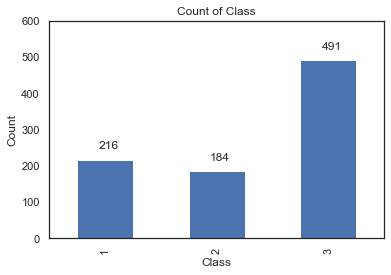

In [144]:
ax = df['Pclass'].value_counts().sort_index().plot(kind='bar')

ax.set_ylim(0, 600)
ax.set_title("Count of Class")
ax.set_ylabel("Count")
ax.set_xlabel("Class")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.19, p.get_height()+30))
plt.show()

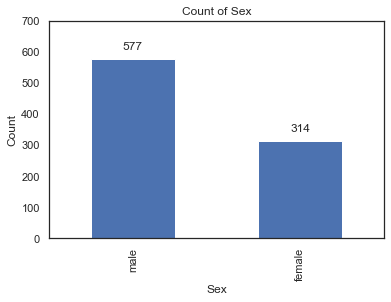

In [145]:
ax = df['Sex'].value_counts().plot(kind='bar')

ax.set_ylim(0, 700)

ax.set_title("Count of Sex")
ax.set_ylabel("Count")
ax.set_xlabel("Sex")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.19, p.get_height()+30))
plt.show()

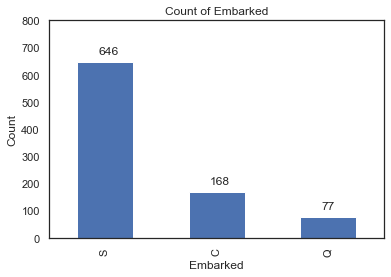

In [146]:
ax = df['Embarked'].value_counts().plot(kind='bar')

ax.set_ylim(0, 800)

ax.set_title("Count of Embarked")
ax.set_ylabel("Count")
ax.set_xlabel("Embarked")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.19, p.get_height()+30))
plt.show()

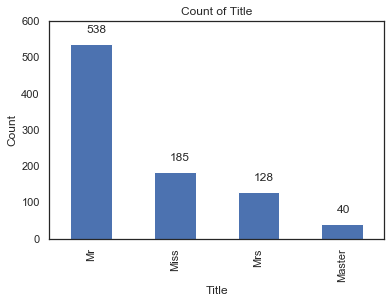

In [147]:
ax = df['Title'].value_counts().plot(kind='bar')

ax.set_ylim(0, 600)
ax.set_title("Count of Title")
ax.set_ylabel("Count")
ax.set_xlabel("Title")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.19, p.get_height()+30))
plt.show()

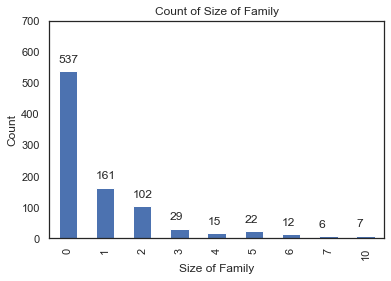

In [148]:
ax = df['Size of Family'].value_counts().sort_index().plot(kind='bar')

ax.set_ylim(0, 700)
ax.set_title("Count of Size of Family")
ax.set_ylabel("Count")
ax.set_xlabel("Size of Family")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+30))
plt.show()

In [149]:
df.groupby(['Title']).mean()[['Fare', 'Size of Family', 'Fare Per Person']]

,Fare,Size of Family,Fare Per Person
Title,,,
Master,34.703125,3.675000,8.040836
Miss,43.800092,1.243243,28.100069
Mr,24.842176,0.440520,17.547273
Mrs,45.607161,1.500000,21.757116


#### Mrs spend the most but have more family members than miss, masters have the most family members and pay the least per person
#### Mr have the least family members and pay in total the lowest amount.

In [150]:
df.groupby(['Title', 'Pclass']).size()

Title   Pclass
Master  1           3
        2           9
        3          28
Miss    1          48
        2          35
        3         102
Mr      1         120
        2          99
        3         319
Mrs     1          45
        2          41
        3          42
dtype: int64

#### Even though misses pay the highest per person but they usually pay for third class rooms
#### And Mrs which pay the second highest amount per person but the highest overall book the highest percentage of first class.

In [151]:
sex_survived_df = df.groupby(['Sex', 'Survived']).size()
sex_survived_df = sex_survived_df.reset_index()
sex_survived_df = sex_survived_df.rename({0: 'Count'}, axis=1)

total_numbers_per_sex = sex_survived_df.groupby(['Sex']).sum()['Count']
sex_survived_df['Percentage per Sex'] = sex_survived_df.apply(lambda x: ((x['Count'] / total_numbers_per_sex.iloc[0])) * 100
                                                      if x['Sex'] == 'female' 
                                                      else (x['Count'] / total_numbers_per_sex.iloc[1] * 100), axis=1)

sex_survived_df['Percentage per Sex'] = sex_survived_df['Percentage per Sex'].round(decimals=2)
# .astype(str)
# sex_survived_df['Percentage per Sex'] = sex_survived_df['Percentage per Sex'] + "%"

total_number = sex_survived_df['Count'].sum()

sex_survived_df['Percentage Total'] = sex_survived_df.apply(lambda x: round((x['Count'] / total_number) * 100, 2), axis=1)

sex_survived_df

,Sex,Survived,Count,Percentage per Sex,Percentage Total
0,female,0,81,25.80,9.09
1,female,1,233,74.20,26.15
2,male,0,468,81.11,52.53
3,male,1,109,18.89,12.23


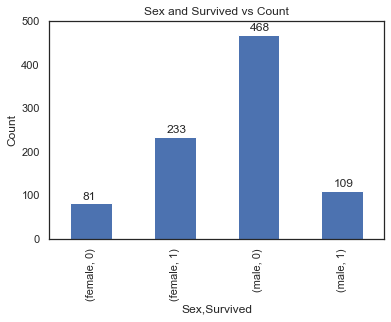

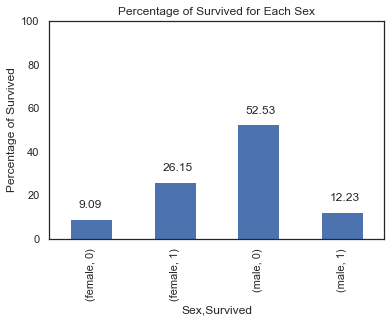

In [152]:
ax = sex_survived_df.set_index(['Sex', 'Survived'])['Count'].plot(kind='bar')

ax.set_ylim(0, 500)
ax.set_title("Sex and Survived vs Count")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height()+9))
    
plt.show()

ax = sex_survived_df.set_index(['Sex', 'Survived'])['Percentage Total'].plot(kind='bar')
ax.set_title("Percentage of Survived for Each Sex")
ax.set_ylabel("Percentage of Survived")
ax.set_ylim(0, 100)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.10, p.get_height() + 5))
plt.show()


### Analysis of how many survived per each sex yielded the following:
#### 1: The majority of females survived which were 233 which out of 314 with a percentage of 74.2% of total females and 26.15% of the overall number.
#### 2: Only 109 men survived out of the 819 total passenger recorded in the data which acccounts for 12.23% of the over all number.
#### 3: It seems by far men gave up their seats on the lifeboats for woman and children to survive.

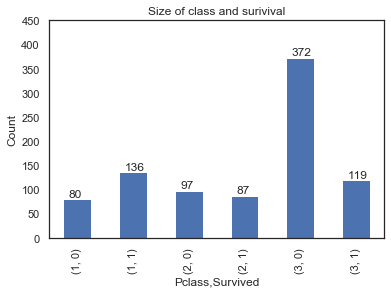

In [153]:
ax = df.groupby(['Pclass', 'Survived']).size().plot(kind='bar')

ax.set_ylim(0, 450)
ax.set_title("Size of class and surivival")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.10, p.get_height() + 5))
    

### It seems that class had an affect on whether you survived or not
#### The highest percentage of survivals are from the first class, followed by second class and then in the last place is the third class and these people are the majority of deaths.
#### It would be interesting to see whether sex played a role in each class or not.

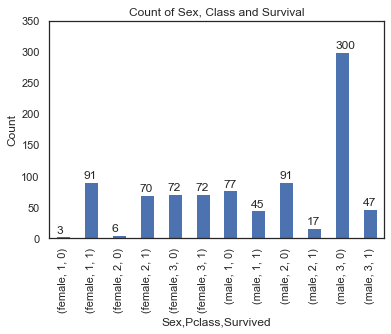

In [154]:
ax = df.groupby(['Sex','Pclass','Survived']).size().plot(kind='bar')

ax.set_ylim(0, 350)
ax.set_title("Count of Sex, Class and Survival")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 5))

### It seems that the chance of surivial was influnced heavily by the both the class and the gender for exmaple:
#### 1: Despite there being more females in first class than second class the chance of suriving the crash if you were a female and had a first class cabin was the greatest by far
#### 2: Followed by second class females and then lastly third class females had a chance of 50% of surviving despite first class (97% chance of surivial approx) and second class (92% chance of survival approx) being so high.
#### 3: First class men had the highest chance of survival followed by surpisingly third class and then second class men had the lowest chance of suriving.

In [155]:
#df['Age'].value_counts(bins=[df['Age'].min(), 18, 30, df['Age'].max()])

### We could create a column describing if that person was an underage, young adult or an adult depending on the previous bins.

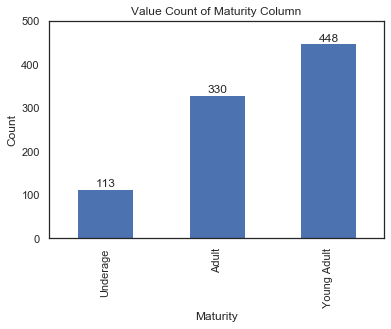

In [156]:
def maturity(x):
    if x < 18:
        return 'Underage'
    elif x < 30:
        return 'Young Adult'
    else:
        return 'Adult'

df['Maturity'] = df['Age'].apply(maturity)

ax = df['Maturity'].value_counts().sort_values().plot.bar()
ax.set_ylim(0, 500)
ax.set_title("Value Count of Maturity Column")
ax.set_ylabel("Count")
ax.set_xlabel("Maturity")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.17, p.get_height() + 5))

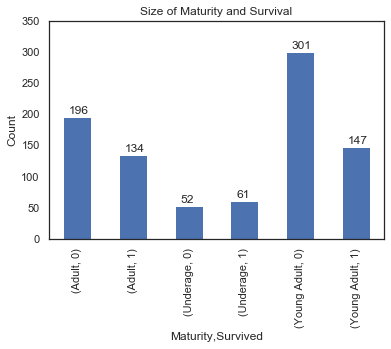

In [157]:
ax = df.groupby(['Maturity', 'Survived']).size().plot(kind='bar')

ax.set_ylim(0, 350)
ax.set_title("Size of Maturity and Survival")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.10, p.get_height() + 5))
plt.show()

### Suprisingly I thought the gap between the underaged who survived and who didn't would be way bigger than this, but this might be due to the chaos and them being unable to act properly in such a situation without their guardian.

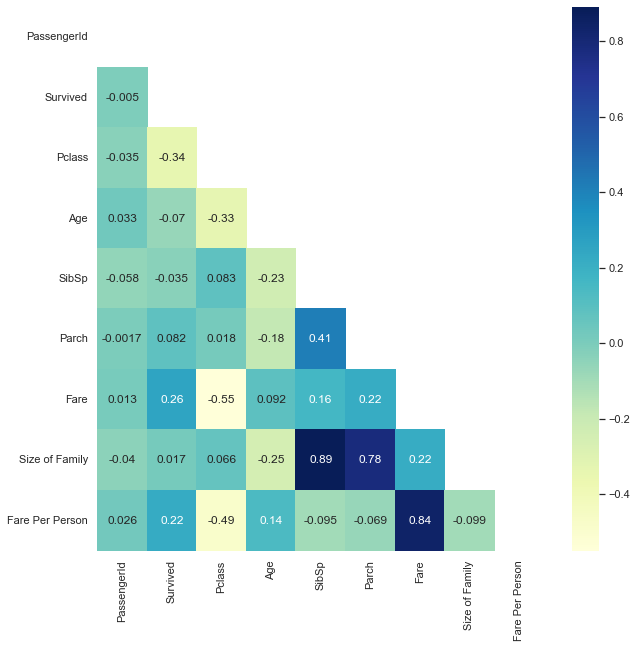

In [158]:
corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True, linewidths=0)
plt.show()

### It seems there are quite a few columns that are highly correlated to each other, might consider them if I am going to use a model that is affected by multicollinearty

C:\Users\Abdullah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdullah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdullah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

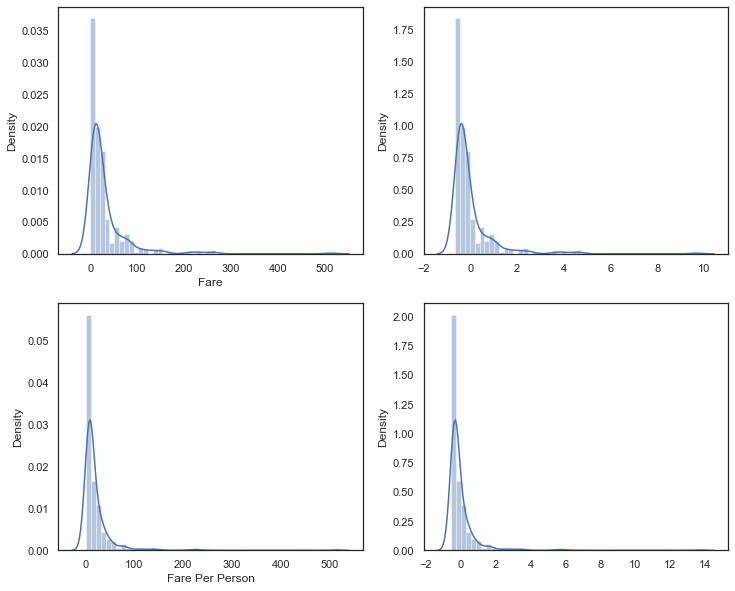

13.746431368712512

In [207]:
from sklearn.preprocessing import StandardScaler

fig, ax=plt.subplots(2,2, figsize=(12, 10))

scaler = StandardScaler()
norm = scaler.fit_transform(df[['Fare', 'Fare Per Person']])
sns.distplot(df['Fare'], ax=ax[0, 0])
#ax[0].set_title("Original Data")
sns.distplot(norm[:, 0], ax=ax[0, 1])
sns.distplot(df['Fare Per Person'], ax=ax[1, 0])
#ax[1].set_title("Scaled data")
sns.distplot(norm[:, 1], ax=ax[1,1])
plt.show()

norm.max()

In [171]:
df[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Last Name,First Name,Size of Family,Fare Per Person,Maturity
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Miss,Ward,Anna,0,512.3292,Adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Mr,Cardeza,Thomas Drake Martinez,1,256.1646,Adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Mr,Lesurer,Gustave J,0,512.3292,Adult


In [208]:
df['First Name'].nunique(), df['Last Name'].nunique()

## Initially I thought spliting the full name into first name and last name would reduce the cardinality in it, this is somewhat
## True but not enough to keep them in the data so they will be removed along side of PassengerId and Name in the next step.

(799, 667)

In [159]:
df.to_csv("Datasets/EDA.csv", index=False)